# Access Control Effector - Compare Accounting Responses

In [1]:
library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)
library(reshape2)
library(nlme)

data_base <- "/data/reiner/jss-experiments"

preprocess <- function(label, path) {
    if (file.exists(path)) {
        if (file.size(path) > 0) {
            print(sprintf ("Reading %s %s", label, path))
            
            data <- read.csv(path, header=TRUE)

            #data <- data[which(data$operation != 'public static org.iobserve.drive.accounting.Response org.iobserve.drive.accounting.HttpRequestUtils.get(java.net.URL)'),]

            base_time <- data[1,4]

            data[,4] <- (data[,4] - base_time)/1000/1000
            data[,3] <- data[,3]/1000/1000
            
            return(data)
        } else {
            print(sprintf("%s file %s is empty.", label, path))
            return(0)
        }
    } else {
        print(sprintf("%s file %s is missing", label, path))
        return(0)
    }
}

sans_path <- sprintf("%s/accounting-sans/responses/response-time.csv", data_base)
effector_path <- sprintf("%s/accounting/responses/response-time.csv", data_base)

effector_data <- preprocess("Effector", effector_path)
sans_data <- preprocess("Baseline", sans_path)


[1] "Reading Effector /data/reiner/jss-experiments/accounting/responses/response-time.csv"
[1] "Reading Baseline /data/reiner/jss-experiments/accounting-sans/responses/response-time.csv"


In [2]:
n<-dim(effector_data)[1]
effector_data2 <- effector_data[with(effector_data, order(time)),]
effector_data2 <- data.frame(effector_data2[floor(n/2):n,])

n<-dim(sans_data)[1]
sans_data2 <- sans_data[with(sans_data, order(time)),]
sans_data2 <- data.frame(sans_data2[floor(n/2):n,])


[1] "200000 100001"


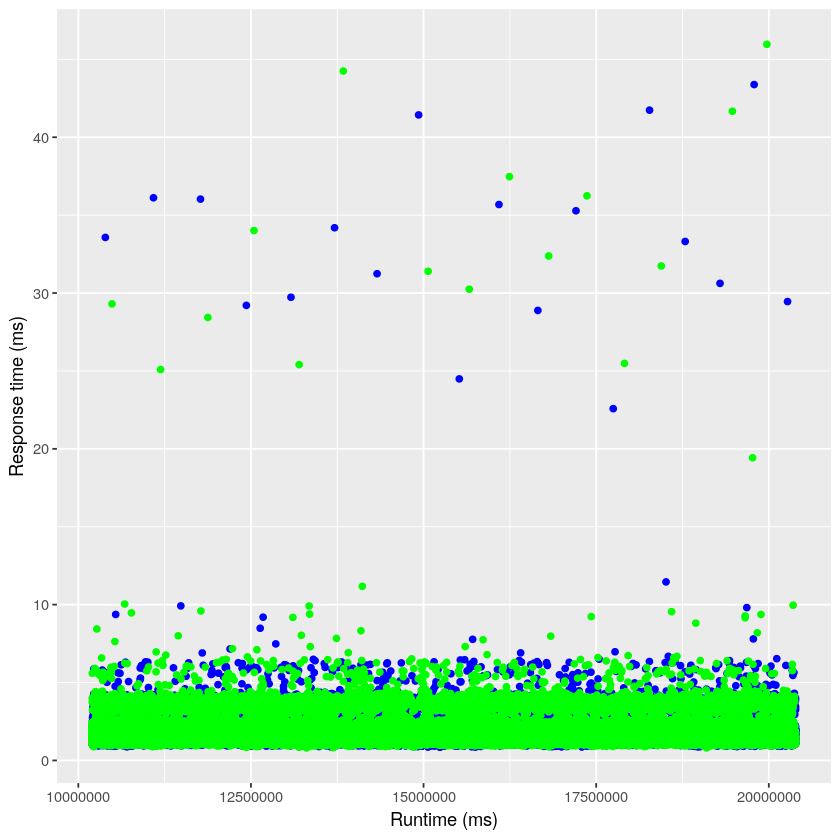

In [3]:
print(sprintf("%d %d", dim(effector_data)[1], dim(effector_data2)[1]))
ggplot(effector_data2, aes(time, response.time)) + 
     geom_point(colour = "blue") +
     geom_point(data = sans_data2, colour="green") +
     ylab("Response time (ms)") +
     xlab("Runtime (ms)")

Warning message:
“Removed 40002 rows containing non-finite values (stat_boxplot).”

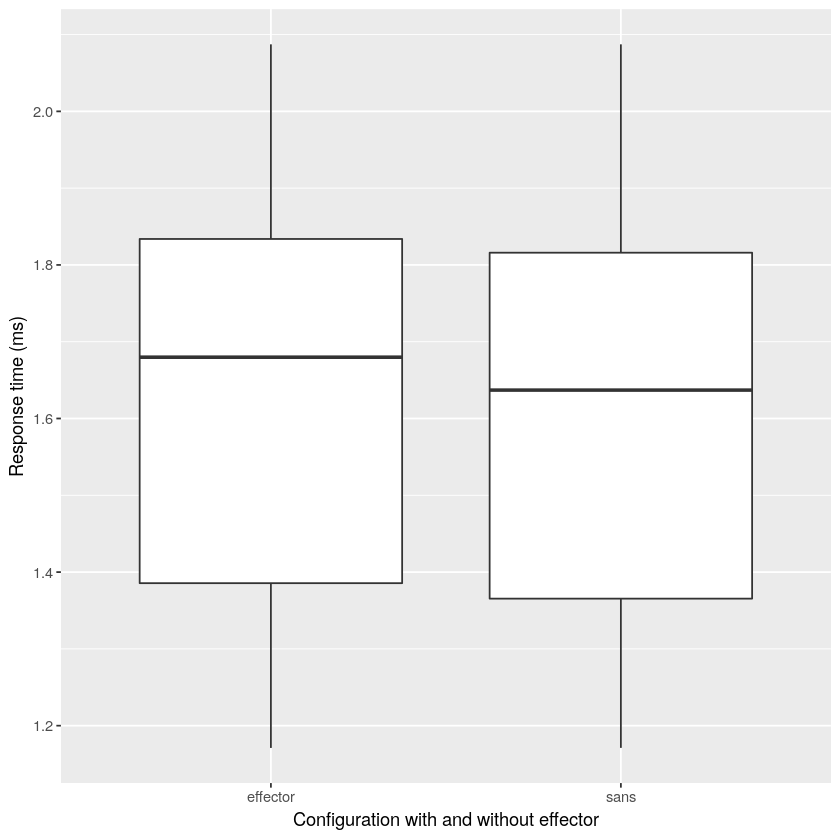

In [4]:
merged <- data.frame(effector=effector_data2$response.time, sans=sans_data2$response.time)

melted <- melt(merged, measure.vars=c("effector", "sans"))

ggplot(melted, aes(x=variable, value)) + 
    geom_boxplot(outlier.shape = NA) +
    scale_y_continuous(limits = quantile(melted$value, c(0.1, 0.9))) +
    ylab("Response time (ms)") +
    xlab("Configuration with and without effector")

In [13]:
remove_outliers <- function(x) {
  return(x[!x %in% boxplot.stats(x)$out])
}

e <- effector_data2$response.time
s <- sans_data2$response.time
woo_e <- remove_outliers(effector_data2$response.time)
woo_s <- remove_outliers(sans_data2$response.time)

q_e <- quantile(e, c(0.1, 0.25, 0.5, 0.75, 0.9))
q_s <- quantile(s, c(0.1, 0.25, 0.5, 0.75, 0.9))

q_woo_e <- quantile(woo_e, c(0.1, 0.25, 0.5, 0.75, 0.9))
q_woo_s <- quantile(woo_s, c(0.1, 0.25, 0.5, 0.75, 0.9))

print(sprintf("Standard deviation (all): effector %f  sans %f", sd(e), sd(s)))
print(sprintf("Standard deviation (woo): effector %f  sans %f", sd(woo_e), sd(woo_s)))

print(sprintf("Variance           (all): effector %f  sans %f", sd(e), sd(s)))
print(sprintf("Variance           (woo): effector %f  sans %f", sd(woo_e), sd(woo_s)))

print(sprintf("Mean               (all): effector %f  sans %f", mean(e), mean(s)))
print(sprintf("Mean               (woo): effector %f  sans %f", mean(woo_e), mean(woo_s)))

print(sprintf("Median             (all): effector %f  sans %f", q_e[3], q_s[3]))
print(sprintf("Median             (woo): effector %f  sans %f", q_woo_e[3], q_woo_s[3]))

print(sprintf("Q10                (all): effector %f  sans %f", q_e[1], q_s[1]))
print(sprintf("Q10                (woo): effector %f  sans %f", q_woo_e[1], q_woo_s[1]))

print(sprintf("Q1                 (all): effector %f  sans %f", q_e[2], q_s[2]))
print(sprintf("Q1                 (woo): effector %f  sans %f", q_woo_e[2], q_woo_s[2]))

print(sprintf("Q3                 (all): effector %f  sans %f", q_e[4], q_s[4]))
print(sprintf("Q3                 (woo): effector %f  sans %f", q_woo_e[4], q_woo_s[4]))

print(sprintf("Q90                (all): effector %f  sans %f", q_e[5], q_s[5]))
print(sprintf("Q90                (woo): effector %f  sans %f", q_woo_e[5], q_woo_s[5]))

[1] "Standard deviation (all): effector 0.679586  sans 0.664500"
[1] "Standard deviation (woo): effector 0.342778  sans 0.330014"
[1] "Variance           (all): effector 0.679586  sans 0.664500"
[1] "Variance           (woo): effector 0.342778  sans 0.330014"
[1] "Mean               (all): effector 1.698461  sans 1.679018"
[1] "Mean               (woo): effector 1.621974  sans 1.601395"
[1] "Median             (all): effector 1.681521  sans 1.635025"
[1] "Median             (woo): effector 1.660715  sans 1.614820"
[1] "Q10                (all): effector 1.166978  sans 1.174481"
[1] "Q10                (woo): effector 1.162839  sans 1.171040"
[1] "Q1                 (all): effector 1.327873  sans 1.312932"
[1] "Q1                 (woo): effector 1.319010  sans 1.305002"
[1] "Q3                 (all): effector 1.920121  sans 1.871044"
[1] "Q3                 (woo): effector 1.875073  sans 1.838169"
[1] "Q90                (all): effector 2.095804  sans 2.077051"
[1] "Q90                (

Warning message:
“Removed 40002 rows containing non-finite values (stat_ydensity).”

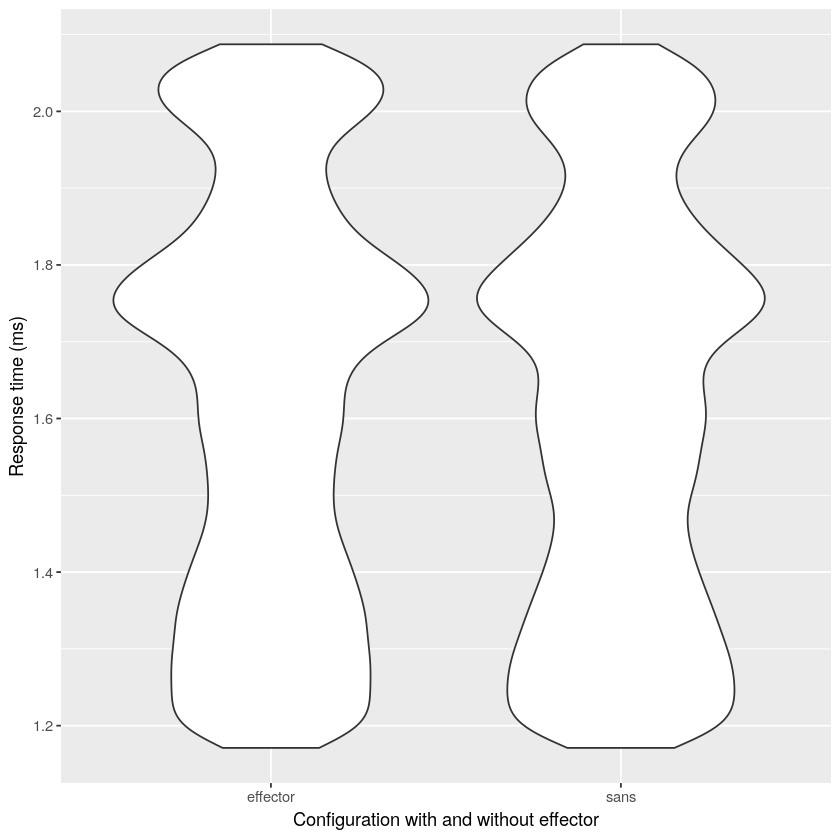

In [6]:
ggplot(melted, aes(x=variable, value)) + 
    geom_violin() +
    scale_y_continuous(limits = quantile(melted$value, c(0.1, 0.9))) +
    ylab("Response time (ms)") +
    xlab("Configuration with and without effector")